In [72]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [73]:
### Load data about metrics into dataframes
# load results.pickle
with open(os.path.join('..', 'Modeling', 'results.pickle'), 'rb') as file:
    all_results = pickle.load(file)

# get separate dataframes for multiclass and binary classification tasks
multiclass = pd.DataFrame({key: all_results[key]['final_results']['metric_values'] for key in all_results.keys() if len(all_results[key]['final_results']['classes']) > 2})
binary = pd.DataFrame({key: all_results[key]['final_results']['metric_values'] for key in all_results.keys() if len(all_results[key]['final_results']['classes']) == 2})

# for metrics like accuracy, precision, etc the values are stored on a by-cell-type basis. Take the balanced average of these values for final values per model per metric
multiclass_df = multiclass.map(np.mean)
binary_df = binary.map(np.mean)

# display results
display(multiclass_df)
display(binary_df)

All Cells                       \
              RandomForestClassifier KNeighborsClassifier   
accuracy                    0.842308             0.823932   
precision                   0.535702             0.478315   
sensitivity                 0.525755             0.469929   
specificity                 0.904563             0.893579   
ROC AUC (OVO)               0.843519             0.818663   
ROC AUC (OVR)               0.842615             0.817661   

                    L1 and L2 and RL                       
              RandomForestClassifier KNeighborsClassifier  
accuracy                    0.801453             0.759483  
precision                   0.699179             0.629792  
sensitivity                 0.687971             0.619711  
specificity                 0.848858             0.816451  
ROC AUC (OVO)               0.853207             0.821280  
ROC AUC (OVR)               0.857134             0.825888

L1 and RL                       \
            RandomForestClassifier KNeighborsClassifier   
accuracy                  0.737255             0.737255   
precision                 0.740608             0.750378   
sensitivity               0.729283             0.725381   
specificity               0.729283             0.725381   
ROC AUC                   0.827883             0.816177   

                         L2 and RL                       \
            RandomForestClassifier KNeighborsClassifier   
accuracy                  0.821818             0.781818   
precision                 0.824181             0.808802   
sensitivity               0.809450             0.754679   
specificity               0.809450             0.754679   
ROC AUC                   0.874473             0.882127   

                         L3 and RL                       \
            RandomForestClassifier KNeighborsClassifier   
accuracy                  0.823529             0.815126   
precision                 0.824779             0.815765   
sensitivity               0.824045             0.815498   
specificity               0.824045             0.815498   
ROC AUC                   0.891149             0.887123   

                  Monoblast and RL                       \
            RandomForestClassifier KNeighborsClassifier   
accuracy                  0.840336             0.810924   
precision                 0.840254             0.823619   
sensitivity               0.840447             0.808366   
specificity               0.840447             0.808366   
ROC AUC                   0.922767             0.895845   

                 Myeloblast and RL                       \
            RandomForestClassifier KNeighborsClassifier   
accuracy                  0.793388             0.739669   
precision                 0.794256             0.746789   
sensitivity               0.794256             0.736513   
specificity               0.794256             0.736513   
ROC AUC                   0.859829             0.847726   

                 All blasts and RL                       
            RandomForestClassifier KNeighborsClassifier  
accuracy                  0.754310             0.754310  
precision                 0.754784             0.754481  
sensitivity               0.754310             0.754310  
specificity               0.754310             0.754310  
ROC AUC                   0.831376             0.829816

,Classification Task,Classifier,ROC AUC
0,All Cells,RandomForestClassifier,0.843519
1,All Cells,KNeighborsClassifier,0.818663
2,L1 and L2 and RL,RandomForestClassifier,0.853207
3,L1 and L2 and RL,KNeighborsClassifier,0.821280
0,L1 and RL,RandomForestClassifier,0.827883
1,L1 and RL,KNeighborsClassifier,0.816177
2,L2 and RL,RandomForestClassifier,0.874473
3,L2 and RL,KNeighborsClassifier,0.882127
4,L3 and RL,RandomForestClassifier,0.891149
5,L3 and RL,KNeighborsClassifier,0.887123


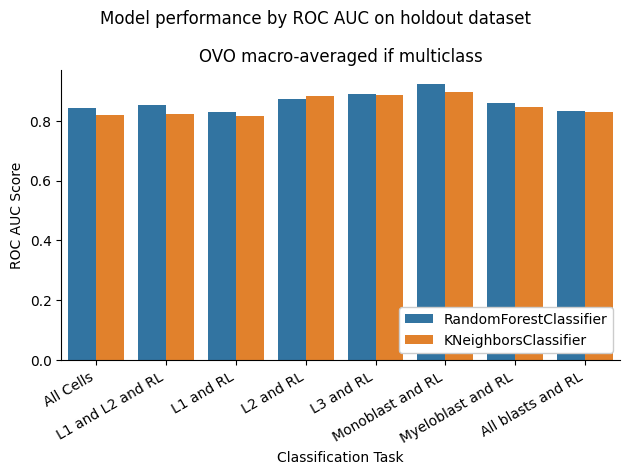

In [ ]:
### Get AUC values for a bar plot
# get a single multiindexed Pandas Series with accuracy for all classification tasks
multiclass_auc = multiclass_df.loc['ROC AUC (OVO)']
binary_auc = binary_df.loc['ROC AUC']
multiclass_auc = multiclass_auc.reset_index(name='ROC AUC (OVO)')
binary_auc = binary_auc.reset_index(name='ROC AUC')
multiclass_auc.columns = ['Classification Task', 'Classifier', 'ROC AUC']
binary_auc.columns = ['Classification Task', 'Classifier', 'ROC AUC']
auc_values = pd.concat([multiclass_auc, binary_auc])
display(auc_values)

### Plot these AUC values
sns.barplot(data = auc_values, x='Classification Task', y='ROC AUC', hue='Classifier')
plt.xticks(rotation=30, ha='right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='lower right', framealpha=1)
plt.suptitle('Model performance by ROC AUC on holdout dataset')
plt.title('OVO macro-averaged if multiclass')
plt.ylabel('ROC AUC Score')
plt.tight_layout()
plt.savefig(f"model_auc_600dpi.png", dpi=600)
plt.show()

In [75]:
### Get accuracy values for a bar plot
# get a single multiindexed Pandas Series with accuracy for all classification tasks
accuracy_values = pd.concat([multiclass_df, binary_df], axis=1).loc['accuracy']
# unstack this series
accuracy_values = accuracy_values.reset_index(name='accuracy')
accuracy_values.columns = ['Classification Task', 'Classifier', 'accuracy']
# display the values
display(accuracy_values)

,Classification Task,Classifier,accuracy
0,All Cells,RandomForestClassifier,0.842308
1,All Cells,KNeighborsClassifier,0.823932
2,L1 and L2 and RL,RandomForestClassifier,0.801453
3,L1 and L2 and RL,KNeighborsClassifier,0.759483
4,L1 and RL,RandomForestClassifier,0.737255
5,L1 and RL,KNeighborsClassifier,0.737255
6,L2 and RL,RandomForestClassifier,0.821818
7,L2 and RL,KNeighborsClassifier,0.781818
8,L3 and RL,RandomForestClassifier,0.823529
9,L3 and RL,KNeighborsClassifier,0.815126


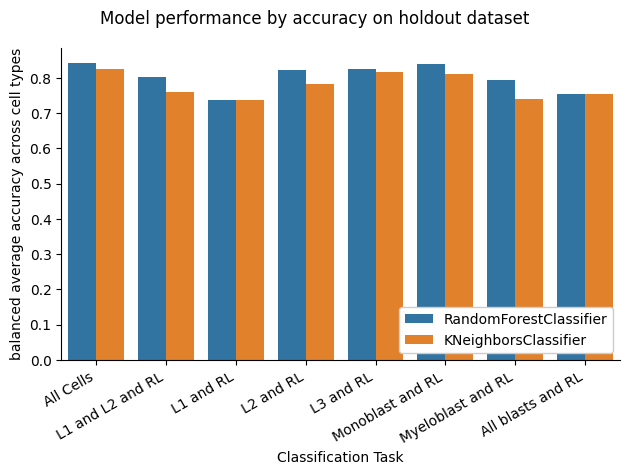

In [76]:
### Plot these accuracy values
sns.barplot(data = accuracy_values, x='Classification Task', y='accuracy', hue='Classifier')
plt.xticks(rotation=30, ha='right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='lower right', framealpha=1)
plt.suptitle('Model performance by accuracy on holdout dataset')
plt.ylabel('balanced average accuracy across cell types')
plt.tight_layout()
plt.savefig(f"model_accuracy_600dpi.png", dpi=600)
plt.show()

/tmp/ipykernel_21774/1920397513.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
/tmp/ipykernel_21774/1920397513.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


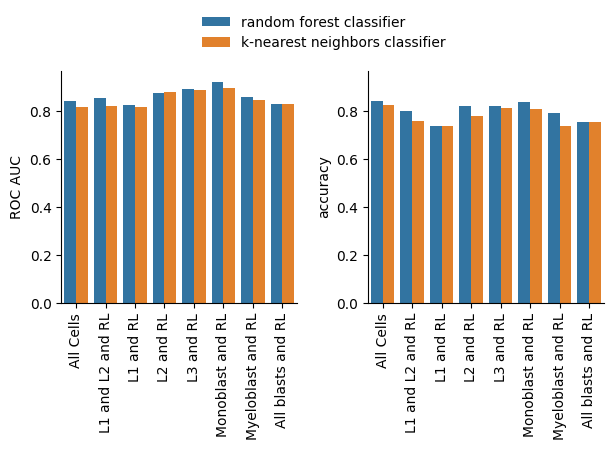

In [77]:
# make figure
# help from Chat GPT
# make figure
def rename_classifier(row):
    if row['Classifier'] == 'RandomForestClassifier':
        return 'random forest classifier'
    elif row['Classifier'] == 'KNeighborsClassifier':
        return 'k-nearest neighbors classifier'
    else:
        raise ValueError()
    
accuracy_values['Classifier'] = accuracy_values.apply(rename_classifier, axis=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 4), sharey=True)

# left plot (AUC)
sns.barplot(data = auc_values, x='Classification Task', y='ROC AUC', hue='Classifier', legend=False, ax=ax1)
# remove spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# axis labels
ax1.set_xlabel('')            # Removes x axis label/title on ax2
plt.ylabel('ROC AUC Score')
# ax1.set_xlabel('')


# right plot (accuracy)
sns.barplot(data = accuracy_values, x='Classification Task', y='accuracy', hue='Classifier', ax=ax2)
# remove spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
# axis labels
plt.ylabel('accuracy')
ax2.set_xlabel('')            # Removes x axis label/title on ax2
# show tick labels on ax2 as well
ax2.yaxis.set_tick_params(labelleft=True)

# legend
# remove default seaborn legend
ax2.legend_.remove()
# add combined legend to the right
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), frameon=False)

# # global plot settings
# make x-tick labels vertical
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
# get rid of x labels
# ensure enough room for the labels at the bottom and between plots
fig.subplots_adjust(bottom=0.3, wspace=0.3)
plt.savefig(f"model_l_auc_r_accuracy_600dpi.png", bbox_inches='tight', dpi=600)
plt.show()